**Problem 1**

In [8]:
%reset -f
from functions import *

T = sp.Matrix([
    [0, -sp.Rational(1,2), sp.sqrt(3)/2, 0],
    [1, 0, 0, 2],
    [0, sp.sqrt(3)/2, sp.Rational(1,2), 0],
    [0, 0, 0, 1]
])

display(T)

peram = find_denevit_hartenberg_perameters_from_transformation(T)
display(peram)


Matrix([
[0,      -1/2, sqrt(3)/2, 0],
[1,         0,         0, 2],
[0, sqrt(3)/2,       1/2, 0],
[0,         0,         0, 1]])

{a: 2, alpha: pi/3, d: 0, theta: pi/2}

**Problem 2**

In [9]:
%reset -f
from functions import *

A, B, C = sp.symbols('A B C')

T_12  =  Tranlation_matrix([A,0,0])  *  Rotation_matrix(-90, 'x', deg=True)  *  Rotation_matrix(-90, 'y', deg=True)
print("From system 2 to system 1")
display(T_12)

T_23  =  Tranlation_matrix([C,-B,0])  *  Rotation_matrix(90, 'z', deg=True) 
print("From system 3 to system 2")
display(T_23)

T_13 = T_12 * T_23
print("From system 3 to system 1")
display(T_13)


From system 2 to system 1


Matrix([
[0,  0, -1, A],
[1,  0,  0, 0],
[0, -1,  0, 0],
[0,  0,  0, 1]])

From system 3 to system 2


Matrix([
[0, -1, 0,  C],
[1,  0, 0, -B],
[0,  0, 1,  0],
[0,  0, 0,  1]])

From system 3 to system 1


Matrix([
[ 0,  0, -1, A],
[ 0, -1,  0, C],
[-1,  0,  0, B],
[ 0,  0,  0, 1]])

**Problem 3**

Piecewise((10*sin(pi*t), t <= 2), (0, (t >= 2) & (t <= 3)), (-10*sin(pi*(t - 3)), (t >= 3) & (t <= 5)))

{c1: 10/pi, c2: 0, c3: -10/pi**3}

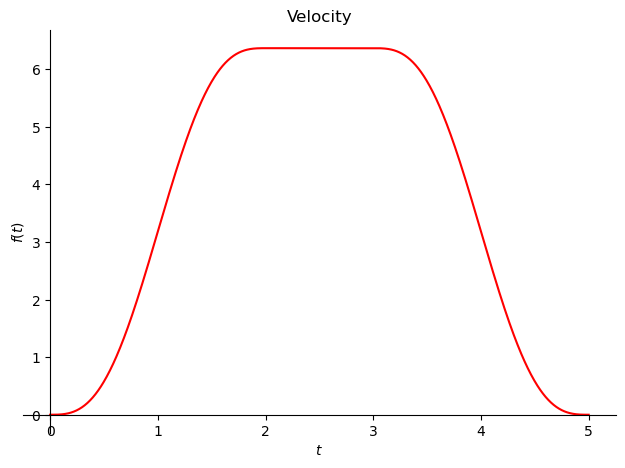

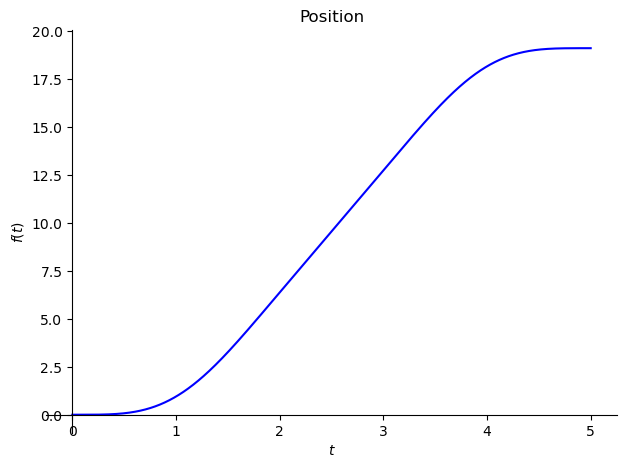

Maxima: 2.02 with value: 20/pi = 6.366
Minima: 0 with value: 0 = 0
position at t=2 is 6.36619772367581
position at T + 2: 19.0985931710274


In [10]:
%reset -f
from functions import *

s_0 = 0
v_0 = 0
a_0 = 0

t, T = sp.symbols('t, T', real=True, positive=True)
c1, c2, c3 = sp.symbols('c1 c2 c3')

T=3
j = sp.Piecewise((10*sin(pi*t), sp.Interval(0,2).contains(t)), 
                 (0, sp.Interval(2,T).contains(t)),
                 (10*sin(pi + pi*(t-T)), sp.Interval(T,T+2).contains(t)))

display(j)

a = sp.integrate(j, t) + c1
v = sp.integrate(a, t) + c2
s = sp.integrate(v, t) + c3

constants = sp.solve([s.subs(t,0) - s_0, v.subs(t,0) - v_0, a.subs(t,0) - a_0], (c1, c2, c3))
display(constants)

a, v, s = a.subs(constants), v.subs(constants), s.subs(constants)

domain = sp.Interval(0, T+2)

# Plot the velocity function
v_plot = sp.plot((v, (t, domain.start, domain.end)), show=True, line_color='r', title='Velocity')
s_plot = sp.plot((s, (t, domain.start, domain.end)), show=True, line_color='b', title='Position')

def Find_maxmin_in_function(f, var, domain):

    all_points = np.linspace(domain.start, domain.end, 100)
    # Evaluate f(t) at all points to find the maximum value
    v_values = [f.subs(var, point) for point in all_points]

    max = f.subs(var, all_points[np.argmax(v_values)])
    min = f.subs(var, all_points[np.argmin(v_values)])
    print(f"Maxima: { all_points[np.argmax(v_values)].evalf(3) } with value: {max} = {max.evalf(4)}")
    print(f"Minima: { all_points[np.argmin(v_values)].evalf(3) } with value: {min} = {min.evalf(4)}")

    return all_points[np.argmax(v_values)], np.max(v_values), all_points[np.argmin(v_values)], np.min(v_values)


vals = Find_maxmin_in_function(v,t,domain)

print(f"position at t=2 is {s.subs(t,2).evalf()}")

print(f"position at T + 2: {s.subs(t,T+2).evalf()}")

**Problem 4**

In [11]:
%reset -f
from functions import *
P0 = sp.Matrix([0.3000,0.2000,0.1000])
Px = sp.Matrix([0.6536,0.5536,0.1000])
Py = sp.Matrix([0.0879,0.4121,0.1000])

T_bt = Transformation_matrix_from_3_points(P0, Px, Py)
print("Transformation matrix from task to base")
display(T_bt)


pp = sp.Matrix([320, 240])
fx = fy = 500

Pp0 = sp.Matrix([270, 140])
Ppx = sp.Matrix([270, 390])
Ppy = sp.Matrix([420, 140])

z_bcam = 1

x0, y0, xx, xy, yx, yy = sp.symbols('x0, y0, xx, xy, yx, yy')

eq1 = sp.Eq(Pp0[0] , -fx*x0/z_bcam + pp[0])
eq2 = sp.Eq(Pp0[1] , -fy*y0/z_bcam + pp[1])
eq3 = sp.Eq(Ppx[0] , -fx*xx/z_bcam + pp[0])
eq4 = sp.Eq(Ppx[1] , -fy*xy/z_bcam + pp[1])
eq5 = sp.Eq(Ppy[0] , -fx*yx/z_bcam + pp[0])
eq6 = sp.Eq(Ppy[1] , -fy*yy/z_bcam + pp[1])

sol = sp.solve((eq1, eq2, eq3, eq4, eq5, eq6))
print("P0 in camera frame")
P0_cam = sp.Matrix([sol[x0], sol[y0], z_bcam])
Px_cam = sp.Matrix([sol[xx], sol[xy], z_bcam])
Py_cam = sp.Matrix([sol[yx], sol[yy], z_bcam])
display(P0_cam.evalf())
display(Px_cam.evalf())
display(Py_cam.evalf())

T_ct = Transformation_matrix_from_3_points(P0_cam, Px_cam, Py_cam)

print("Transformation matrix from task to camera")
display(T_ct)

Pnewp_cam = sp.Matrix([340, 360])
xnew, ynew = sp.symbols('xnew ynew')
eq7 = sp.Eq(Pnewp_cam[0] , -fx*xnew/z_bcam + pp[0])
eq8 = sp.Eq(Pnewp_cam[1] , -fy*ynew/z_bcam + pp[1])
sol_new = sp.solve((eq7, eq8))
Pnew_cam = sp.Matrix([sol_new[xnew], sol_new[ynew], z_bcam, 1])

T_bc = T_bt * T_ct.inv()
Pnew_b = T_bc * Pnew_cam

print("New point in base frame")
display(Pnew_b)


Transformation matrix from task to base


Matrix([
[0.7071, -0.7071,   0, 0.3],
[0.7071,  0.7071,   0, 0.2],
[     0,       0, 1.0, 0.1],
[     0,       0,   0, 1.0]])

P0 in camera frame


Matrix([
[0.1],
[0.2],
[1.0]])

Matrix([
[ 0.1],
[-0.3],
[ 1.0]])

Matrix([
[-0.2],
[ 0.2],
[ 1.0]])

Transformation matrix from task to camera


Matrix([
[   0, -1.0,    0, 0.1],
[-1.0,    0,    0, 0.2],
[   0,    0, -1.0, 1.0],
[   0,    0,    0, 1.0]])

New point in base frame


Matrix([
[0.5121],
[0.6101],
[   0.1],
[   1.0]])

**Problem 5**

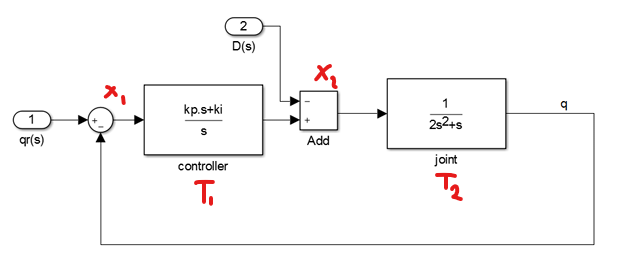

In [14]:
%reset -f
from functions import *
kp = 0.3
ki = 0.03

qr, q, T1, T2, D = sp.symbols('q_r q T1 T2 D')
x1, x2 = sp.symbols('x1 x2')
transfer = sp.symbols('Trans')

s = sp.symbols('s')
T1 = (kp*s+ki)/s
T2 = 1/(2*s**2+s)


eq1 = sp.Eq(x1, qr - q)
eq2 = sp.Eq(x2, x1*T1 - D)
eq3 = sp.Eq(q, x2*T2)
eq4 = sp.Eq(transfer, q/qr)

sol = sp.solve((eq1, eq2, eq3, eq4), (x1, x2, q, transfer))
q = sol[q].simplify()

display(q)
print("Normalized Transfer Function:")
display(Normalize_fraction(q, 200))

# Steady state error
input = qr
output = q
error = (input - output).subs({D:0.1/s, qr:1.5/s})
display((error))
Ess = sp.limit((input - output)*s, s, 0)

print(f"Steady state error: {Ess}")




(-100.0*D*s + 30.0*q_r*s + 3.0*q_r)/(200.0*s**3 + 100.0*s**2 + 30.0*s + 3.0)

Normalized Transfer Function:


(-0.5*D*s + 0.15*q_r*s + 0.015*q_r)/(1.0*s**3 + 0.5*s**2 + 0.15*s + 0.015)

-(35.0 + 4.5/s)/(200.0*s**3 + 100.0*s**2 + 30.0*s + 3.0) + 1.5/s

Steady state error: 0
